```bash
git clone https://github.com/jordanlab/STing
cd STing
./autogen.sh
./configure
make
sudo make install
# cp bin/* scripts/
cd ..
python STing/scripts/db_util.py fetch --query "Campylobacter jejuni" --out_dir my_dbs --build_index
```

In [1]:
%run ../../multibench.py

In [2]:
from inspect import isfunction
import os, sys
import matplotlib.pyplot as plt
import asciitable
import sys
import os
import shutil
import numpy as np
import glob
from shutil import copyfile
import pathlib


# Summarize numpy array if it has more than 10 elements
np.set_printoptions(threshold=10)

def clean_if_exists(path):
    if os.path.exists(path):
        if(os.path.isfile(path)):
            os.remove(path)
        else:
            shutil.rmtree(path)
            os.mkdir(path)
def get_last_n_lines(string, n):
    return "\n".join(string.split("\n")[-n:])
def create_folder_if_doesnt_exist(path):
    if not os.path.exists(path):
        os.makedirs(path)

# Move two upper directories, import benchmark, revert cwd
sys.path.insert(0, os.path.dirname(os.path.abspath(pathlib.Path().absolute())) + "/..")

In [3]:
input_samples = [os.path.basename(f) for f in glob.glob('input/*_1.fastq.gz')]
input_samples = [f.replace('_1.fastq.gz','') for f in input_samples]
print(input_samples)

['PNUSAL001024', 'SH14-021', 'SH14-015', 'SH12-011', 'SH12-001', '2014D-0068', 'SH14-025', 'D7322', 'SH14-004', 'MOD1_LS998', '2014D-0070', 'PNUSA000196', 'SH14-003', 'SH12-012', 'SH10-014', 'SH12-010', 'PNUSAL000870', 'SH12-006', 'D7331', 'SH14-024', 'MOD1_LS989', 'SH12-013', 'CFSAN023467', 'SH14-005', 'SH14-014', 'D7334', 'MOD1_LS996', 'SH14-013', 'SH09-29', 'SH13-003', 'SH14-009', 'SH14-016', 'SH12-004', 'SH11-001', 'SH14-027', 'SH12-005', 'SH14-011', 'PNUSA000195', 'SH13-004', 'SH14-010', 'MOD1_LS1005', 'SH14-019', 'SH14-028', 'CFSAN023469', 'MOD1_LS995', 'D7316', 'MOD1_LS1008', 'SH13-001', 'SH14-012', '2014D-0067', 'SH14-001', 'SH08-001', 'PNUSA000194', 'MOD1_LS997', 'CFSAN023464', 'PNUSAL000957', 'MOD1_LS1011', 'D7323', 'SH10-30', 'D7330', 'D7327', 'SH11-002', 'SH13-002', 'SH12-007', 'SH13-006', 'SH14-023', 'CFSAN023466', 'SH14-022', 'SH14-008', 'D7321', '2014D-0189', 'SH12-009', 'D7329', 'SH10-002', 'D7333', 'MOD1_LS1003', 'CFSAN023471', 'SH14-017', 'MOD1_LS1009', 'MOD1_LS994', 

In [4]:
sample_sizes = list(range(1, 20, 3))
sample_sizes

[1, 4, 7, 10, 13, 16, 19]

In [5]:
def reset_func():
    for file in glob.glob("outputs/*"):
        clean_if_exists(file)
    
def benchmark_list_to_results(benchmark_firsts_list):
    return {
        "memory": max(list(map(lambda result: result.memory.max, benchmark_firsts_list))),
        "disk_read": max(list(map(lambda result: result.disk.read_chars, benchmark_firsts_list))),
        "disk_write": max(list(map(lambda result: result.disk.write_chars, benchmark_firsts_list))),
        "runtime": sum(list(map(lambda result: result.process.execution_time, benchmark_firsts_list)))
    }

def sampling_func(sample_size):
    samples = input_samples[:sample_size]
    return samples

mlst_data_strain_name = "campylobacter_jejuni"

typer_command = {
    "command": "typer -x my_dbs/" + mlst_data_strain_name + "/db/index -1 input/%_1.fastq.gz -2 input/%_2.fastq.gz",
    "parallel_args": "-j 1 -I%"
}

# active_output_print: prints stdout and stderr on every iteration
multibench_results, debug_str = multi_cmdbench({
"type": [typer_command]
}, reset_func = reset_func, iterations = 10, sampling_func = sampling_func, sample_sizes = sample_sizes, 
    benchmark_list_to_results = benchmark_list_to_results, active_output_print = False, progress_bar = True)


In [6]:
save_path = "multibench_results.txt"

samples_per_sample_size = []
for sample_size in sample_sizes:
        samples_per_sample_size.append(input_samples[:sample_size])

save_multibench_results(multibench_results, samples_per_sample_size, save_path)

In [7]:
read_path = "multibench_results.txt"

multibench_results, samples_per_sample_size = read_multibench_results(read_path)
print(samples_per_sample_size)

[['PNUSAL001024'], ['PNUSAL001024,', 'SH14-021,', 'SH14-015,', 'SH12-011'], ['PNUSAL001024,', 'SH14-021,', 'SH14-015,', 'SH12-011,', 'SH12-001,', '2014D-0068,', 'SH14-025'], ['PNUSAL001024,', 'SH14-021,', 'SH14-015,', 'SH12-011,', 'SH12-001,', '2014D-0068,', 'SH14-025,', 'D7322,', 'SH14-004,', 'MOD1_LS998'], ['PNUSAL001024,', 'SH14-021,', 'SH14-015,', 'SH12-011,', 'SH12-001,', '2014D-0068,', 'SH14-025,', 'D7322,', 'SH14-004,', 'MOD1_LS998,', '2014D-0070,', 'PNUSA000196,', 'SH14-003'], ['PNUSAL001024,', 'SH14-021,', 'SH14-015,', 'SH12-011,', 'SH12-001,', '2014D-0068,', 'SH14-025,', 'D7322,', 'SH14-004,', 'MOD1_LS998,', '2014D-0070,', 'PNUSA000196,', 'SH14-003,', 'SH12-012,', 'SH10-014,', 'SH12-010'], ['PNUSAL001024,', 'SH14-021,', 'SH14-015,', 'SH12-011,', 'SH12-001,', '2014D-0068,', 'SH14-025,', 'D7322,', 'SH14-004,', 'MOD1_LS998,', '2014D-0070,', 'PNUSA000196,', 'SH14-003,', 'SH12-012,', 'SH10-014,', 'SH12-010,', 'PNUSAL000870,', 'SH12-006,', 'D7331']]


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 15, 3

[{'runtime': 0.291, 'memory': 95862784.0, 'disk_read': 47637264.2, 'disk_write': 463329.7}, {'runtime': 0.926, 'memory': 101044633.6, 'disk_read': 186185234.8, 'disk_write': 734114.4}, {'runtime': 1.587, 'memory': 101502566.4, 'disk_read': 324493163.8, 'disk_write': 947632.5}, {'runtime': 2.261, 'memory': 102059622.4, 'disk_read': 462974605.1, 'disk_write': 1153706.7}, {'runtime': 2.925, 'memory': 102463078.4, 'disk_read': 601247569.4, 'disk_write': 1362293.2}, {'runtime': 3.539, 'memory': 102522880.0, 'disk_read': 739579641.5, 'disk_write': 1561794.2}, {'runtime': 4.216, 'memory': 102526976.0, 'disk_read': 877847475.8, 'disk_write': 1766254.0}]


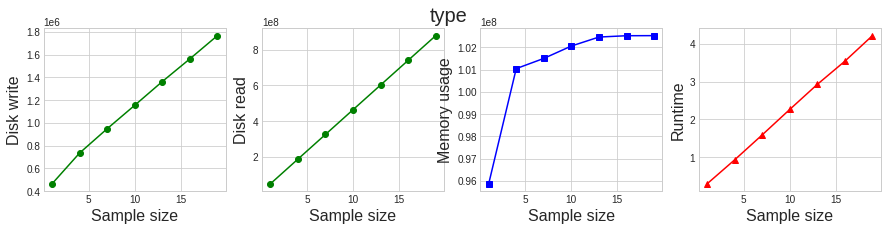

In [9]:
# Typer command Plots
plot_resources(multibench_results, sample_sizes, "type")